In [1]:
import pandas as pd
df=pd.read_csv("emp.csv")

In [2]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Question 1: Can I remove EmployeeNumber, Over18, StandardHours and Employee count? 
# If yes, why and if no, give the reasons.

<AxesSubplot:>

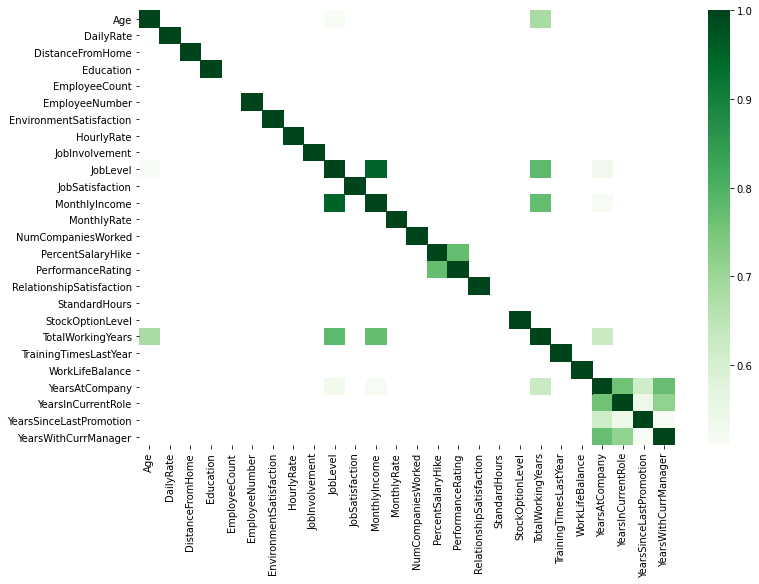

In [5]:
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt
corr = df.corr()

kot = corr[corr>=.5]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

## From the above correlation analysis we have found that EmployeeNumber, Over18, StandardHours and Employee count are not much correlated in the data provide hence removing these features will be a good decision.

# Question 2: Consider 'Attrition' as class label and convert attrition Yes-1 and No-0

In [6]:
df['Attrition']=df['Attrition'].replace({'No': 0, 'Yes': 1})

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Question 3: Perform one hot encoding on the relavant columns

In [8]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer
onehotencoder = OneHotEncoder() 
columnTransformer = ColumnTransformer([('encoder', 
                                        OneHotEncoder(), 
                                        [0])], 
                                      remainder='passthrough') 
df_pre = pd.DataFrame(np.array(columnTransformer.fit_transform(df), dtype = np.str))
df_pre

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,80,0,8,0,1,6,4,0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,80,1,10,3,3,10,7,1,7
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,80,0,7,3,3,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,80,0,8,3,3,8,7,3,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,80,1,17,3,3,5,2,0,3
1466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,80,1,9,5,3,7,7,1,7
1467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2,80,1,6,0,3,6,2,0,3
1468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,80,0,17,3,2,9,6,0,8


In [9]:
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender','JobRole','MaritalStatus','Over18','OverTime'] 
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
df[categorical_cols] =df[categorical_cols].apply(lambda col: le.fit_transform(col))
categorical_cols=pd.DataFrame(df[categorical_cols])
categorical_cols

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,2,2,1,0,7,2,0,1
1,1,1,1,1,6,1,0,0
2,2,1,4,1,2,2,0,1
3,1,1,1,0,6,1,0,1
4,2,1,3,1,2,1,0,0
...,...,...,...,...,...,...,...,...
1465,1,1,3,1,2,1,0,0
1466,2,1,3,1,0,1,0,0
1467,2,1,1,1,4,1,0,1
1468,1,2,3,1,7,1,0,0


In [10]:
df=df.drop(['BusinessTravel', 'Department', 'EducationField', 'Gender','JobRole','MaritalStatus','Over18','OverTime'],axis=1)
df_model=pd.concat([df,categorical_cols],axis=1)
df_model


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,41,1,1102,1,2,1,1,2,94,3,...,0,5,2,2,1,0,7,2,0,1
1,49,0,279,8,1,1,2,3,61,2,...,1,7,1,1,1,1,6,1,0,0
2,37,1,1373,2,2,1,4,4,92,2,...,0,0,2,1,4,1,2,2,0,1
3,33,0,1392,3,4,1,5,4,56,3,...,3,0,1,1,1,0,6,1,0,1
4,27,0,591,2,1,1,7,1,40,3,...,2,2,2,1,3,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,41,4,...,0,3,1,1,3,1,2,1,0,0
1466,39,0,613,6,1,1,2062,4,42,2,...,1,7,2,1,3,1,0,1,0,0
1467,27,0,155,4,3,1,2064,2,87,4,...,0,3,2,1,1,1,4,1,0,1
1468,49,0,1023,2,3,1,2065,4,63,2,...,0,8,1,2,3,1,7,1,0,0


# Question 4: Implement KNN

In [11]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   DailyRate                 1470 non-null   int64
 3   DistanceFromHome          1470 non-null   int64
 4   Education                 1470 non-null   int64
 5   EmployeeCount             1470 non-null   int64
 6   EmployeeNumber            1470 non-null   int64
 7   EnvironmentSatisfaction   1470 non-null   int64
 8   HourlyRate                1470 non-null   int64
 9   JobInvolvement            1470 non-null   int64
 10  JobLevel                  1470 non-null   int64
 11  JobSatisfaction           1470 non-null   int64
 12  MonthlyIncome             1470 non-null   int64
 13  MonthlyRate               1470 non-null   int64
 14  NumCompaniesWorked        1470 non-null 

In [12]:
X = df.drop(['EmployeeNumber','Attrition'], axis=1)
X_col = X.columns

In [13]:
y = df['Attrition']
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X.values)
from sklearn.model_selection import train_test_split

In [14]:
df1 = pd.DataFrame(X, columns=X_col)
df1.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.742527,-1.010909,-0.891688,0.0,-0.660531,1.383138,0.379672,-0.057788,1.153254,...,-1.584178,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-1.297775,-0.147150,-1.868426,0.0,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,...,1.191438,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1.414363,-0.887515,-0.891688,0.0,1.169781,1.284725,-1.026167,-0.961486,0.246200,...,-0.658973,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,1.461466,-0.764121,1.061787,0.0,1.169781,-0.486709,0.379672,-0.961486,0.246200,...,0.266233,0.0,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,-0.524295,-0.887515,-1.868426,0.0,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,...,1.191438,0.0,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


In [15]:
X_train, X_test, y_train, y_test = train_test_split(df1, y,
                                                    train_size=0.8,
                                                    random_state=42)

In [16]:
from sklearn.preprocessing import MinMaxScaler
min_max_scalar=pd.DataFrame(MinMaxScaler().fit_transform(df.drop(['EmployeeNumber','Attrition'], axis=1).values), columns=X_col)
min_max_scalar.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,0.715820,0.000000,0.25,0.0,0.333333,0.914286,0.666667,0.25,1.000000,...,0.000000,0.0,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118
1,0.738095,0.126700,0.250000,0.00,0.0,0.666667,0.442857,0.333333,0.25,0.333333,...,1.000000,0.0,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765
2,0.452381,0.909807,0.035714,0.25,0.0,1.000000,0.885714,0.333333,0.00,0.666667,...,0.333333,0.0,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000
3,0.357143,0.923407,0.071429,0.75,0.0,1.000000,0.371429,0.666667,0.00,0.666667,...,0.666667,0.0,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000
4,0.214286,0.350036,0.035714,0.00,0.0,0.000000,0.142857,0.666667,0.00,0.333333,...,1.000000,0.0,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647


In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,
                           p=2, metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    v0.1 Follow the scikit learn library format in terms of input
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        res = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, 
                                                                res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, 
                                                                            res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, 
                                                                  res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), 
                                                      lb.transform(res))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        res_test = clf.predict(X_test)
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, 
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, 
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, 
                                                                  res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), 
                                                      lb.transform(res_test))))

In [19]:
print_score(knn, X_train, X_test, y_train, y_test, train=True)

Train Result:

accuracy score: 0.8554

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       978
           1       0.75      0.21      0.33       198

    accuracy                           0.86      1176
   macro avg       0.81      0.60      0.62      1176
weighted avg       0.84      0.86      0.82      1176


Confusion Matrix: 
 [[964  14]
 [156  42]]

ROC AUC: 0.5989

Average Accuracy: 	 0.8239
Accuracy SD: 		 0.0206


In [20]:
print_score(knn, X_train, X_test, y_train, y_test, train=False)

Test Result:

accuracy score: 0.8673

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       255
           1       0.50      0.18      0.26        39

    accuracy                           0.87       294
   macro avg       0.69      0.58      0.60       294
weighted avg       0.83      0.87      0.84       294


Confusion Matrix: 
 [[248   7]
 [ 32   7]]

ROC AUC: 0.5760



# Question 5: Implement Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [22]:
# Function importing Dataset 
def importdata(): 
    balance_data = pd.read_csv( 
'https://archive.ics.uci.edu/ml/machine-learning-'+
'databases/balance-scale/balance-scale.data', 
    sep= ',', header = None) 
      
    # Printing the dataswet shape 
    print ("Dataset Length: ", len(balance_data)) 
    print ("Dataset Shape: ", balance_data.shape) 
      
    # Printing the dataset obseravtions 
    print ("Dataset: ",balance_data.head()) 
    return balance_data 
  
# Function to split the dataset 
def splitdataset(balance_data): 
  
    # Separating the target variable 
    X = balance_data.values[:, 1:5] 
    Y = balance_data.values[:, 0] 
  
    # Splitting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(  
    X, Y, test_size = 0.3, random_state = 100) 
      
    return X, Y, X_train, X_test, y_train, y_test 
      
# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 
      
# Function to perform training with entropy. 
def tarin_using_entropy(X_train, X_test, y_train): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 
  
  
# Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 
      
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred)) 
  
# Driver code 
def main(): 
      
    # Building Phase 
    data = importdata() 
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data) 
    clf_gini = train_using_gini(X_train, X_test, y_train) 
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train) 
      
    # Operational Phase 
    print("Results Using Gini Index:") 
      
    # Prediction using gini 
    y_pred_gini = prediction(X_test, clf_gini) 
    cal_accuracy(y_test, y_pred_gini) 
      
    print("Results Using Entropy:") 
    # Prediction using entropy 
    y_pred_entropy = prediction(X_test, clf_entropy) 
    cal_accuracy(y_test, y_pred_entropy) 
      
      
# Calling main function 
if __name__=="__main__": 
    main() 

Dataset Length:  625
Dataset Shape:  (625, 5)
Dataset:     0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5
Results Using Gini Index:
Predicted values:
['R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L'
 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'R'
 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R'
 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R'
 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R']
Confusion Matrix:  [[ 0  6  7]
 [ 

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Question 6: Implement SVM

In [23]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,y_train)

SVC(random_state=1)

In [24]:
y_pred = classifier.predict(X_test)
# test_set["Predictions"] = y_pred

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.8741496598639455


In [26]:
#confusion matrix
cm

array([[254,   1],
       [ 36,   3]], dtype=int64)

In [27]:
print_score(classifier, X_train, X_test, y_train, y_test, train=True)

Train Result:

accuracy score: 0.8631

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       978
           1       0.97      0.19      0.32       198

    accuracy                           0.86      1176
   macro avg       0.92      0.60      0.62      1176
weighted avg       0.88      0.86      0.82      1176


Confusion Matrix: 
 [[977   1]
 [160  38]]

ROC AUC: 0.5954

Average Accuracy: 	 0.8308
Accuracy SD: 		 0.0070


# Question 7: Identify the best model and give your reasons?

## True Positive means we predicted positive and it’s true. SVM has the highest count of True positive values in the confusion matrix which is 977, followed by KNN which gives true positive count as 964 followed by Decision trees.   Besides that the recall for svm is 100% whereas in KNN it's around 97%, Decision trees it's around 76%. So we can conclude that SVM is the best model among three.
